<a href="https://colab.research.google.com/github/bravenha/ProjectUTS/blob/main/ProjectCNN_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [ ]:
import zipfile
import os

zip_path = "/content/brain_tumor_dataset.zip"  # Sesuaikan dengan nama file ZIP
extract_path = "/content/brain_tumor_dataset"

# Ekstrak dataset jika belum diekstrak
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Dataset berhasil diekstrak! ✅")
else:
    print("Dataset sudah tersedia! ✅")


Dataset berhasil diekstrak! ✅


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Direktori dataset
DATASET_PATH = "/content/brain_tumor_dataset/"

# Preprocessing dan augmentasi data
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalisasi pixel ke [0,1]
    validation_split=0.2, # 80% training, 20% validasi
    rotation_range=20,    # Rotasi acak untuk augmentasi
    zoom_range=0.2,       # Zoom acak
    horizontal_flip=True  # Flip horizontal
)

# Load data train & validasi
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

#mempersiapkan dataset sebelum melatih model.

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Mencegah overfitting
    Dense(1, activation='sigmoid')  # Binary classification (Yes/No tumor)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#membangun model CNN untuk mendeteksi tumor otak

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Latih model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.8890
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8403 - val_accuracy: 0.5000 - val_loss: 1.1649
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.2505 - val_accuracy: 0.7500 - val_loss: 0.6955
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5625 - loss: 0.6333 - val_accuracy: 0.7500 - val_loss: 0.5174
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5625 - loss: 0.6205 - val_accuracy: 0.5000 - val_loss: 0.5973
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6875 - loss: 0.5766 - val_accuracy: 0.7500 - val_loss: 0.4956
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 0.5885 - val_accuracy: 1.0000 - val_loss: 0.4572
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.4490 - val_accuracy: 0.7500 - val_loss: 0.6130
Epoch 9/20
1/1 ━

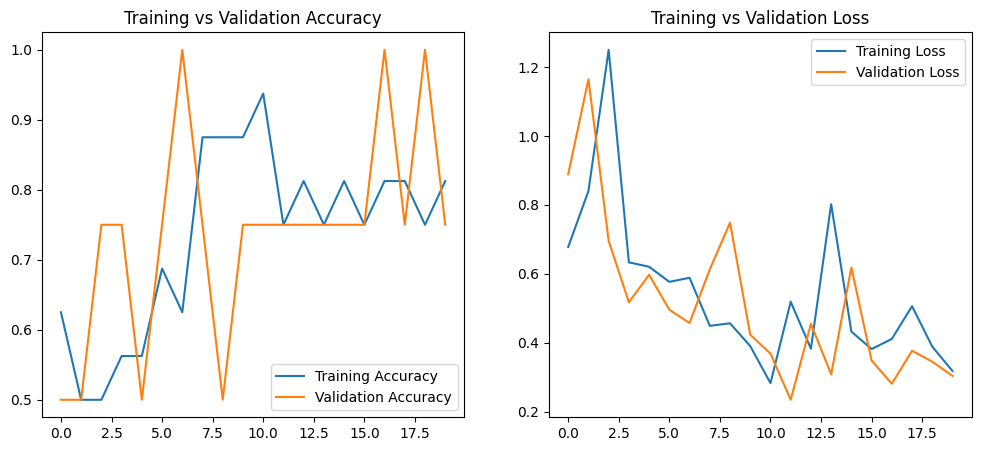

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

#Mengecek Overfitting

In [ ]:
model.save("/content/model_tumor.keras")
print("Model berhasil disimpan! ✅")


Model berhasil disimpan! ✅


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


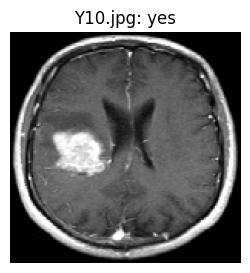

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


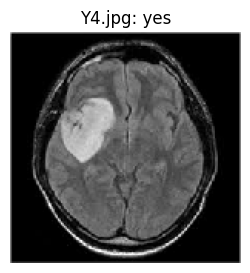

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


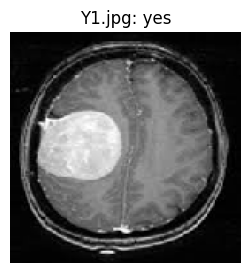

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


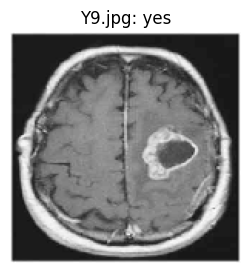

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


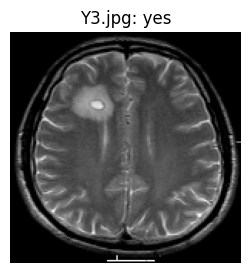

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


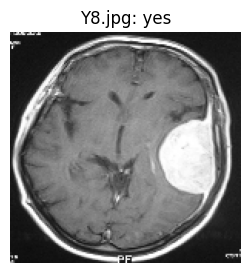

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


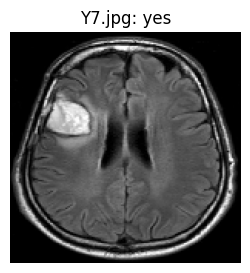

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


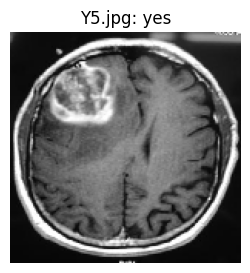

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


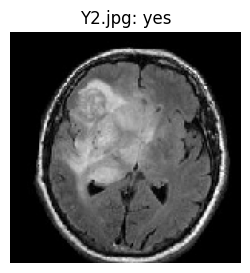

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


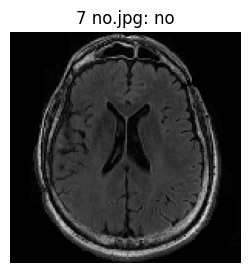

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


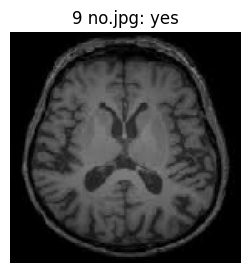

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


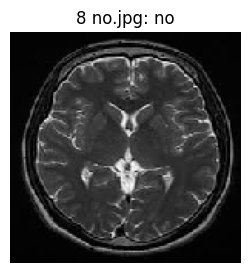

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


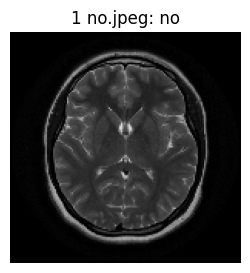

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


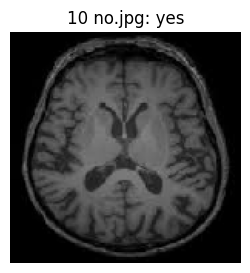

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


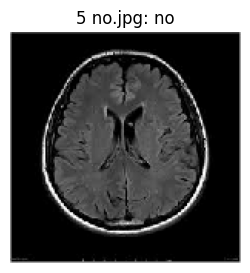

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


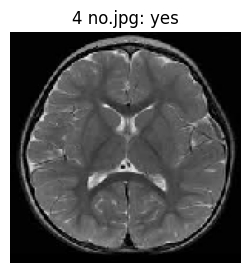

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


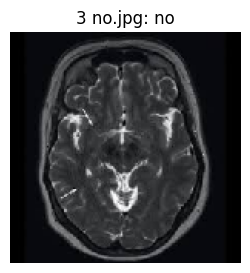

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


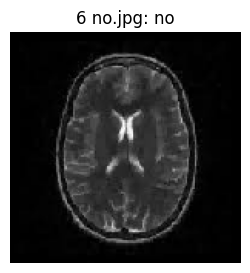

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


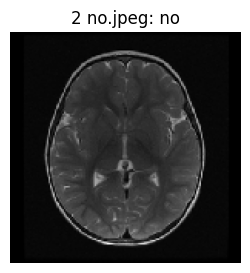

Akurasi Model: 84.21%


In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load model
from tensorflow.keras.models import load_model
model = load_model("/content/model_tumor.keras")

# Folder dataset
TEST_FOLDER_PATH = "/content/brain_tumor_dataset/"
CATEGORIES = ["yes", "no"]  # "yes" = ada tumor, "no" = tidak ada tumor

# Inisialisasi variabel untuk menghitung akurasi
correct_predictions = 0
total_images = 0

# Loop untuk kedua kategori
for category in CATEGORIES:
    folder_path = os.path.join(TEST_FOLDER_PATH, category)

    # Ambil semua file gambar dalam folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)

        # Load dan preprocess gambar
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prediksi menggunakan model
        prediction = model.predict(img_array)
        predicted_class = "yes" if prediction[0][0] > 0.5 else "no"

        # Hitung akurasi
        total_images += 1
        if predicted_class == category:
            correct_predictions += 1

        # Tampilkan hasil prediksi
        plt.figure(figsize=(3, 3))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{image_file}: {predicted_class}")
        plt.show()

# Hitung dan cetak akurasi
accuracy = (correct_predictions / total_images) * 100
print(f"Akurasi Model: {accuracy:.2f}%")


In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1️⃣ Load Model Custom CNN yang Sudah Dilatih
custom_model = load_model("/content/model_tumor.keras")

# 2️⃣ Load Model VGG16 Pretrained (Transfer Learning)
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_vgg.trainable = False  # Freeze layer pretrained

vgg_model = tf.keras.Sequential([
    base_vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3️⃣ Load Dataset Uji (Semua Gambar di Folder)
TEST_FOLDER_PATH = "/content/brain_tumor_dataset/"  # Folder berisi YES dan NO

categories = ["yes", "no"]
y_true = []
y_pred_custom = []
y_pred_vgg = []

for category in categories:
    folder_path = os.path.join(TEST_FOLDER_PATH, category)
    label = 1 if category == "yes" else 0  # 1 = Tumor, 0 = No Tumor

    for image_file in os.listdir(folder_path):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, image_file)

            # Load dan preprocess gambar
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Prediksi Model Custom CNN
            pred_custom = custom_model.predict(img_array)[0][0]
            pred_custom_label = 1 if pred_custom > 0.5 else 0

            # Prediksi Model VGG16
            pred_vgg = vgg_model.predict(img_array)[0][0]
            pred_vgg_label = 1 if pred_vgg > 0.5 else 0

            # Simpan hasil prediksi
            y_true.append(label)
            y_pred_custom.append(pred_custom_label)
            y_pred_vgg.append(pred_vgg_label)

# 4️⃣ Evaluasi Akurasi Model
from sklearn.metrics import accuracy_score

accuracy_custom = accuracy_score(y_true, y_pred_custom) * 100
accuracy_vgg = accuracy_score(y_true, y_pred_vgg) * 100

print(f"Akurasi Model Custom CNN: {accuracy_custom:.2f}%")
print(f"Akurasi Model VGG16: {accuracy_vgg:.2f}%")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score

# 1️⃣ Load Model Custom CNN
custom_model = load_model("/content/model_tumor.keras")

# 2️⃣ Load Model ResNet50 Pretrained
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_resnet.trainable = False  # Freeze pretrained layers

resnet_model = tf.keras.Sequential([
    base_resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3️⃣ Load Dataset Uji (YES dan NO)
TEST_FOLDER_PATH = "/content/brain_tumor_dataset/"
categories = ["yes", "no"]

y_true = []
y_pred_custom = []
y_pred_resnet = []

for category in categories:
    folder_path = os.path.join(TEST_FOLDER_PATH, category)
    label = 1 if category == "yes" else 0  # 1 = Tumor, 0 = No Tumor

    for image_file in os.listdir(folder_path):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, image_file)

            # Load dan preprocess gambar
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Prediksi Model Custom CNN
            pred_custom = custom_model.predict(img_array)[0][0]
            pred_custom_label = 1 if pred_custom > 0.5 else 0

            # Prediksi Model ResNet50
            pred_resnet = resnet_model.predict(img_array)[0][0]
            pred_resnet_label = 1 if pred_resnet > 0.5 else 0

            # Simpan hasil prediksi
            y_true.append(label)
            y_pred_custom.append(pred_custom_label)
            y_pred_resnet.append(pred_resnet_label)

# 4️⃣ Evaluasi Akurasi Model
accuracy_custom = accuracy_score(y_true, y_pred_custom) * 100
accuracy_resnet = accuracy_score(y_true, y_pred_resnet) * 100

print(f"Akurasi Model Custom CNN: {accuracy_custom:.2f}%")
print(f"Akurasi Model ResNet50: {accuracy_resnet:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Folder dataset
DATASET_PATH = "/content/brain_tumor_dataset/"

# Ambil semua gambar dari folder "yes" (Tumor) dan "no" (Tidak Tumor)
categories = ["yes", "no"]
data = []

for category in categories:
    folder_path = os.path.join(DATASET_PATH, category)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)

        # Load dan preprocess gambar
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prediksi dengan model
        prediction = model.predict(img_array)
        predicted_label = "yes" if prediction[0][0] > 0.5 else "no"

        # Simpan hasil
        data.append([image_file, category, predicted_label])

# Buat DataFrame
df_results = pd.DataFrame(data, columns=["Nama File", "Aktual", "Prediksi"])

# Hitung akurasi
df_results["Benar/Salah"] = df_results["Aktual"] == df_results["Prediksi"]
accuracy = df_results["Benar/Salah"].mean() * 100

# Tampilkan hasil
print(df_results)
print(f"\n🔹 Akurasi Model: {accuracy:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
    Nama File Aktual Prediksi  Benar/Salah
0     Y10.jpg    yes      yes         True
1      Y4.jpg    yes      yes         True
2      Y1.jpg    yes      yes         True
3      Y9.jpg    yes      yes         True
4      Y3.jpg    yes      yes         True
5      Y8.jpg    yes

In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, accuracy_score

# Load model custom CNN
custom_model = load_model("/content/model_tumor.keras")

# Load model ResNet50
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_resnet.trainable = False
resnet_model = tf.keras.Sequential([
    base_resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load model VGG16
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_vgg.trainable = False
vgg_model = tf.keras.Sequential([
    base_vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dataset uji
TEST_FOLDER_PATH = "/content/brain_tumor_dataset/"
categories = ["yes", "no"]

y_true = []
y_pred_custom = []
y_pred_resnet = []
y_pred_vgg = []

for category in categories:
    folder_path = os.path.join(TEST_FOLDER_PATH, category)
    label = 1 if category == "yes" else 0

    for image_file in os.listdir(folder_path):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, image_file)

            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Custom CNN
            pred_custom = custom_model.predict(img_array)[0][0]
            pred_custom_label = 1 if pred_custom > 0.5 else 0

            # ResNet50
            pred_resnet = resnet_model.predict(img_array)[0][0]
            pred_resnet_label = 1 if pred_resnet > 0.5 else 0

            # VGG16
            pred_vgg = vgg_model.predict(img_array)[0][0]
            pred_vgg_label = 1 if pred_vgg > 0.5 else 0

            y_true.append(label)
            y_pred_custom.append(pred_custom_label)
            y_pred_resnet.append(pred_resnet_label)
            y_pred_vgg.append(pred_vgg_label)

# Evaluasi tanpa pembulatan
accuracy_custom = accuracy_score(y_true, y_pred_custom) * 100
accuracy_resnet = accuracy_score(y_true, y_pred_resnet) * 100
accuracy_vgg = accuracy_score(y_true, y_pred_vgg) * 100


print(f"✅ Akurasi Custom CNN : {accuracy_custom}%")
print(f"✅ Akurasi ResNet50   : {accuracy_resnet}%")
print(f"✅ Akurasi VGG16      : {accuracy_vgg}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/st

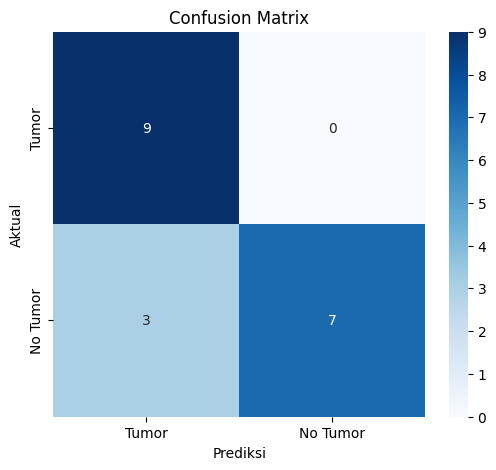

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat Confusion Matrix
cm = confusion_matrix(df_results["Aktual"], df_results["Prediksi"], labels=["yes", "no"])

# Tampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Tumor", "No Tumor"], yticklabels=["Tumor", "No Tumor"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()
